In [1]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


# Preprocessing of Dateset

In [246]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import graphviz
import os
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
sns.set(color_codes = True)
%matplotlib inline 
seed = 10

In [247]:
dd = pd.read_csv('C:/Users/RaKaN/Desktop/Dataset_Project/data_banknote_authentication.txt', delimiter="," ,
                  names =['Variance of Wavelet Transformed image',
                                'Skewness of Wavelet Transformed image',
                                'Curtosis of Wavelet Transformed image',
                                'Entropy of image','Status'])
dd.head(None)

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Status
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [248]:
dd.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance of Wavelet Transformed image    1372 non-null float64
Skewness of Wavelet Transformed image    1372 non-null float64
Curtosis of Wavelet Transformed image    1372 non-null float64
Entropy of image                         1372 non-null float64
Status                                   1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [249]:
dd.isnull().any()

Variance of Wavelet Transformed image    False
Skewness of Wavelet Transformed image    False
Curtosis of Wavelet Transformed image    False
Entropy of image                         False
Status                                   False
dtype: bool

In [250]:
dd.isnull().sum()

Variance of Wavelet Transformed image    0
Skewness of Wavelet Transformed image    0
Curtosis of Wavelet Transformed image    0
Entropy of image                         0
Status                                   0
dtype: int64

In [251]:
dd.describe()

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Status
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [252]:
dd.corr()

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Status
Variance of Wavelet Transformed image,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness of Wavelet Transformed image,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis of Wavelet Transformed image,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy of image,0.276817,-0.526321,0.318841,1.000000,-0.023424
Status,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [253]:
print(dd.shape)

(1372, 5)


0    762
1    610
Name: Status, dtype: int64


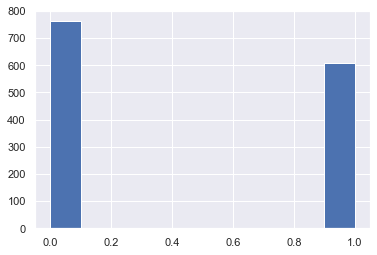

In [254]:
print(dd["Status"].value_counts())
dd["Status"].hist()

In [255]:
dd[(dd["Variance of Wavelet Transformed image"] <=-7) & (dd["Status"] ==1)]

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Status
1233,-7.0421,9.2000,0.25933,-4.6832,1
1294,-7.0364,9.2931,0.16594,-4.5396,1


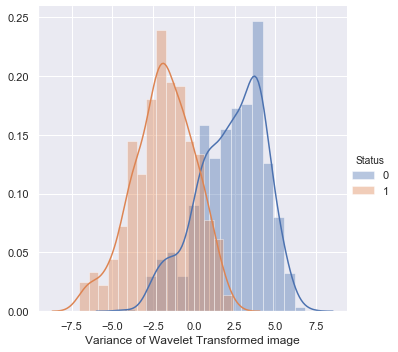

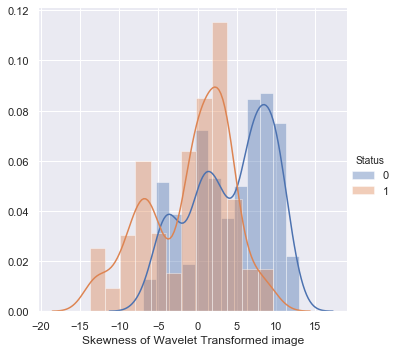

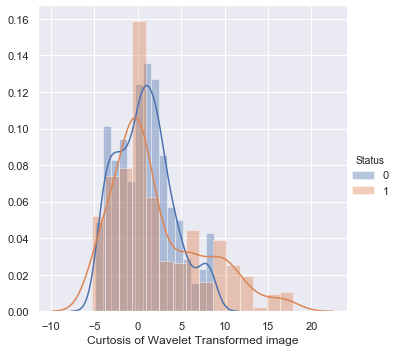

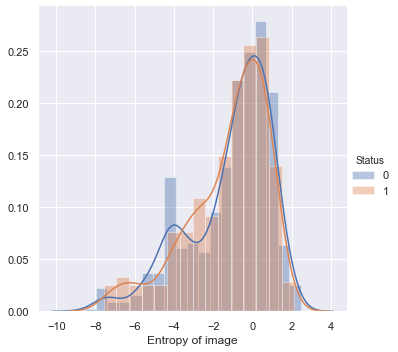

In [256]:
for ojha, feature in enumerate(list(dd.columns)[:-1]):
    fg = sns.FacetGrid(dd, hue='Status', height=5)
    fg.map(sns.distplot, feature ).add_legend()
    plt.show()

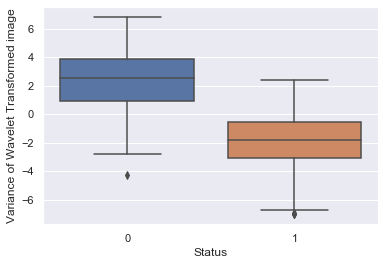

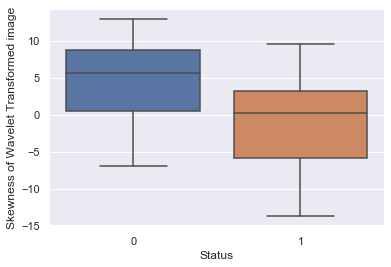

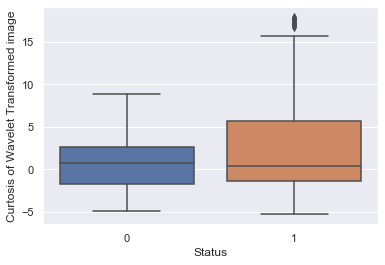

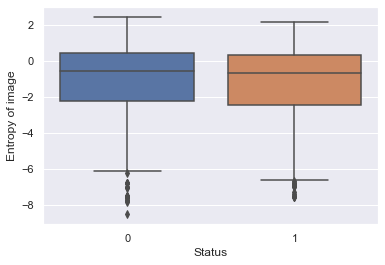

In [257]:
sns.boxplot(x='Status',y='Variance of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Skewness of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Curtosis of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Entropy of image', data=dd)
plt.show()

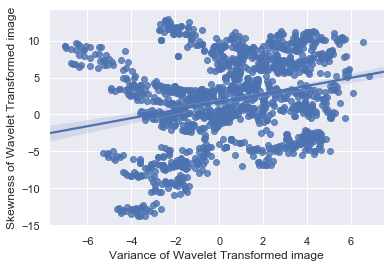

In [258]:
sns.regplot(x=dd['Variance of Wavelet Transformed image'], y=dd['Skewness of Wavelet Transformed image'])

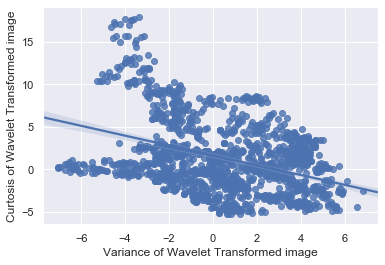

In [259]:
sns.regplot(x=dd['Variance of Wavelet Transformed image'], y=dd['Curtosis of Wavelet Transformed image'])

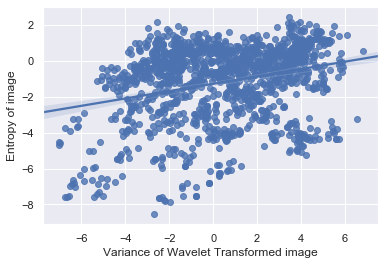

In [260]:
sns.regplot(x=dd['Variance of Wavelet Transformed image'], y=dd['Entropy of image'])

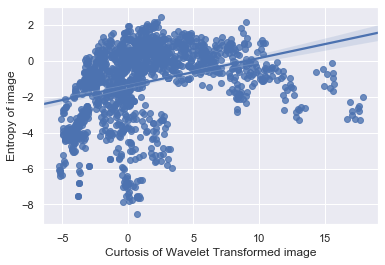

In [261]:
sns.regplot(x=dd['Curtosis of Wavelet Transformed image'], y=dd['Entropy of image'])

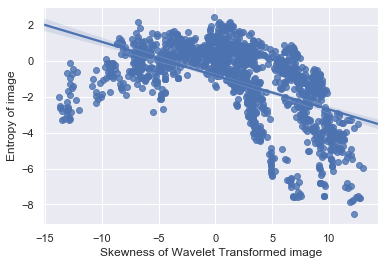

In [262]:
sns.regplot(x=dd['Skewness of Wavelet Transformed image'], y=dd['Entropy of image'])

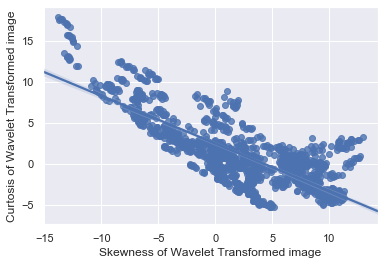

In [263]:
sns.regplot(x=dd['Skewness of Wavelet Transformed image'], y=dd['Curtosis of Wavelet Transformed image'])

In [264]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np
from sklearn.decomposition import PCA
X = dd

print(X)
M = mean(X.T, axis=1)
print("Mean= \n",M)
C=X-M
print("\n Centered= \n", C)
V = cov(C.T)
print("\n Covariance = \n",V)
values, vectors = eig(V)
print("\n Eigne Vector \n",vectors)
print("\n Eigne Value \n",values)
P = vectors.T.dot(C.T)
print("\n Projected Data = \n ",P.T)

      Variance of Wavelet Transformed image  \
0                                   3.62160   
1                                   4.54590   
2                                   3.86600   
3                                   3.45660   
4                                   0.32924   
...                                     ...   
1367                                0.40614   
1368                               -1.38870   
1369                               -3.75030   
1370                               -3.56370   
1371                               -2.54190   

      Skewness of Wavelet Transformed image  \
0                                   8.66610   
1                                   8.16740   
2                                  -2.63830   
3                                   9.52280   
4                                  -4.45520   
...                                     ...   
1367                                1.34920   
1368                               -4.87730   
1369        

In [265]:
le = LabelEncoder()
le.fit(dd['Status'].values)
y = le.transform(dd['Status'].values)
X = dd.drop('Status', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=seed)

Text(0, 0.5, 'accuracy')

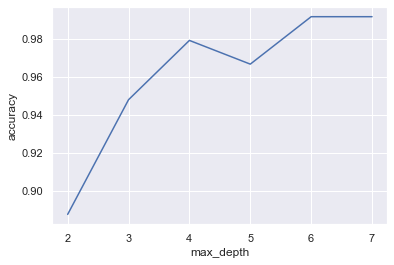

In [266]:
max_depth_range = list(range(2, 8))
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=7,
                              max_depth= depth,
                              random_state=seed)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score) 
plt.plot(max_depth_range,accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')

In [267]:
tree = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=7,
                              max_depth=6,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9916839916839917


Confusion Matrix is
[[266   1]
 [  3 211]]


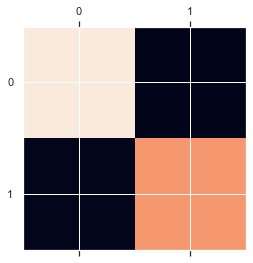

In [268]:
print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [269]:
print(classification_report(y_test, y_pred, labels=dd['Status'].unique()))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.99      0.99       214

    accuracy                           0.99       481
   macro avg       0.99      0.99      0.99       481
weighted avg       0.99      0.99      0.99       481



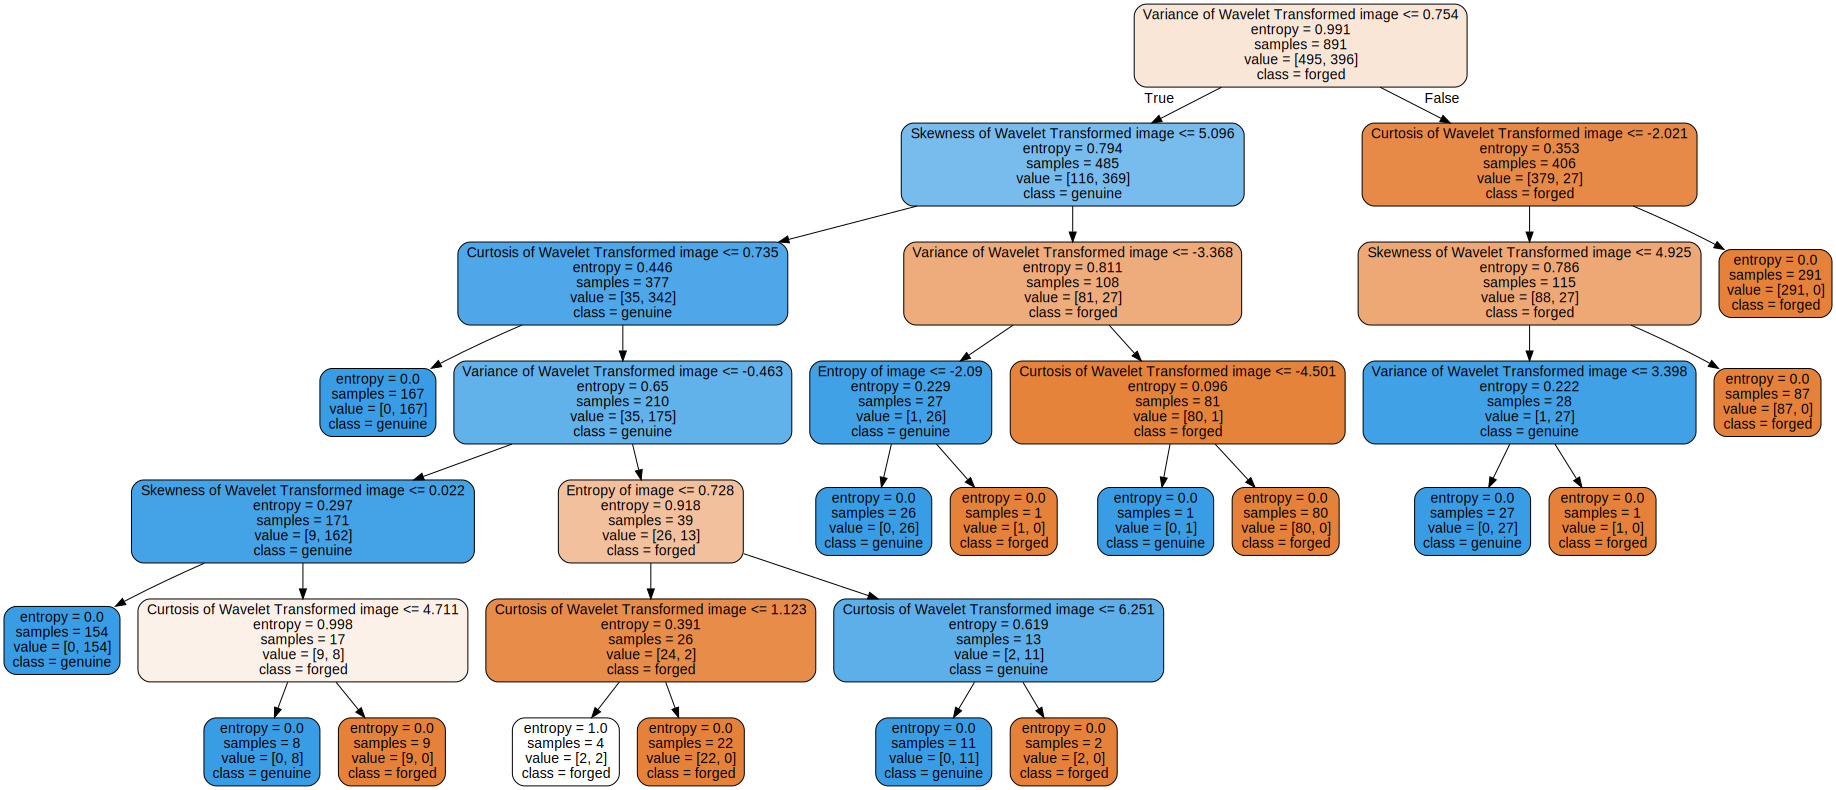

In [245]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['forged','genuine']
    graph_data = export_graphviz(tree,
                                 feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names,
                                 filled=True,
                                 rounded=True,
                                 out_file=None)
    graph = graphviz.Source(graph_data)
    graph.render(plot_title, view = True)
    return graph
tree_graph = plot_tree(tree, dd, 'Status', le, 'Tree DataSet Bank')
tree_graph